

## Introdução
Este projeto utiliza aprendizado de máquina para prever o custo total de imóveis (aluguel + condomínio) em São Paulo, com base em características como tamanho, número de quartos e presença de piscina.

## Objetivo
- Desenvolver modelos de aprendizado de máquina que sejam capazes de prever o custo total dos imóveis.
- Comparar o desempenho de diferentes modelos e otimizar seus hiperparâmetros.
- Documentar todo o processo, desde a preparação dos dados até a análise dos resultados.

## Definição do Problema
Este trabalho busca prever o custo total (aluguel + condomínio) de imóveis na cidade de São Paulo com base em suas características, como tamanho, número de banheiros, vagas na garagem, presença de piscina, entre outros. O objetivo é treinar modelos clássicos de machine learning para realizar essa previsão, avaliando seu desempenho em termos de métricas apropriadas para problemas de regressão.

## Premissas e Restrições
- Premissa: O custo total de um imóvel é influenciado por suas características estruturais e atributos adicionais.
- Restrição: Apenas imóveis para aluguel com coordenadas válidas foram considerados.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Carregar o dataset
url = "https://raw.githubusercontent.com/Ferdisoares/MVP-Fernanda-Soares/refs/heads/main/sp2019.csv"
df = pd.read_csv(url)

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving sp2019.csv to sp2019 (1).csv


In [ ]:
# Carregar o dataset
#df = pd.read_csv("sp2019.csv")
#df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [28]:
# Renomear colunas para facilitar o entendimento
df.columns = [
    'Preço', 'Condomínio', 'Tamanho', 'Quartos', 'Banheiros', 'Suítes',
    'Vagas', 'Elevador', 'Mobiliado', 'Piscina', 'Novo', 'Distrito',
    'Tipo de Negociação', 'Tipo de Imóvel', 'Latitude', 'Longitude'
]

# Visualizar informações básicas do dataset
print("Visualização inicial dos dados:")
display(df.head())

print("\nResumo estatístico:")
display(df.describe())

print("\nValores ausentes:")
display(df.isnull().sum())

Visualização inicial dos dados:


,Preço,Condomínio,Tamanho,Quartos,Banheiros,Suítes,Vagas,Elevador,Mobiliado,Piscina,Novo,Distrito,Tipo de Negociação,Tipo de Imóvel,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436



Resumo estatístico:


,Preço,Condomínio,Tamanho,Quartos,Banheiros,Suítes,Vagas,Elevador,Mobiliado,Piscina,Novo,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000



Valores ausentes:


,0
Preço,0
Condomínio,0
Tamanho,0
Quartos,0
Banheiros,0
Suítes,0
Vagas,0
Elevador,0
Mobiliado,0
Piscina,0


### Checklist - Definição do Problema
1. *Qual é a descrição do problema?*
   Prever o custo total (aluguel + condomínio) dos imóveis em São Paulo com base em suas características.
2. *Premissas e hipóteses:*
   - O custo total é influenciado pelas características do imóvel.
   - Imóveis com mais comodidades têm custos mais elevados.
3. *Restrições ou condições:*
   - Apenas imóveis para aluguel (rent) foram considerados.
   - Imóveis sem coordenadas válidas foram excluídos.
4. *Descrição do dataset:*
   O dataset contém informações de imóveis, como preço de aluguel, valor do condomínio, tamanho, número de quartos, banheiros, presença de piscina, e localização (latitude e longitude).

In [29]:
# Filtrar apenas imóveis para aluguel com coordenadas válidas
df = df[(df["Tipo de Negociação"] == "rent") & (df["Latitude"] != 0)]

# Criar a variável alvo: custo total (Preço + Condomínio)
df['Custo'] = df['Preço'] + df['Condomínio']

# Selecionar os atributos para o modelo
features = ['Tamanho', 'Quartos', 'Banheiros', 'Suítes', 'Vagas',
            'Elevador', 'Mobiliado', 'Piscina', 'Novo']
X = df[features]
y = df['Custo']

print(f"Dimensão dos dados após filtragem: {df.shape}")

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dimensão dos dados após filtragem: (6745, 17)


<ipython-input-29-96d741b55ccf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Custo'] = df['Preço'] + df['Condomínio']


### Checklist - Preparação de Dados
1. *Divisão entre treino e teste:*
   O dataset foi dividido em 80% para treino e 20% para teste.
2. *Método de validação cruzada:*
   Validação cruzada foi aplicada no processo de otimização de hiperparâmetros para evitar overfitting.
3. *Transformação de dados:*
   As variáveis preditoras foram normalizadas no intervalo [0, 1] usando MinMaxScaler.
4. *Feature Selection:*
   Foram selecionados atributos relevantes como tamanho, quartos, banheiros, e presença de comodidades adicionais

In [30]:
# Modelo 1: Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Avaliação da Regressão Linear
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Modelo 2: Random Forest com Grid Search
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Melhor modelo Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Avaliação do Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Comparação entre os modelos
print("Resultados:")
print(f"Regressão Linear - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Resultados:
Regressão Linear - RMSE: 2244.62, R²: 0.68
Random Forest - RMSE: 2221.44, R²: 0.69


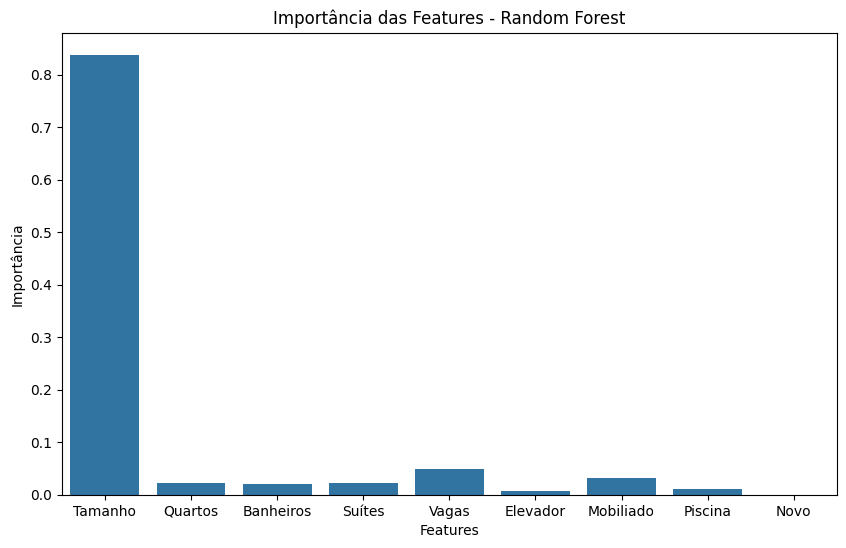

In [31]:
# Importância das features no Random Forest
feature_importances = best_rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title('Importância das Features - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.show()

### Checklist - Modelagem e Treinamento
1. *Algoritmos escolhidos:*
   - Regressão Linear: Modelo simples para estabelecer uma base.
   - Random Forest: Modelo avançado com capacidade de captura de relações não lineares.
2. *O modelo foi devidamente treinado?*
   Sim, com otimização de hiperparâmetros usando validação cruzada.
3. *Hiperparâmetros otimizados:*
   - n_estimators, max_depth, e min_samples_split para Random Forest.
4. *Métodos avançados:*
   Random Forest foi usado, um modelo robusto para conjuntos de dados tabulares.

### Resultados dos Modelos
1. *Regressão Linear:*
   - RMSE: 2244.62
   - R²: 0.68
   
2. *Random Forest (Melhor Modelo):*
   - RMSE: 2221.44
   - R²:  0.69

O modelo Random Forest apresentou melhor desempenho, com menor RMSE e maior R², indicando maior precisão nas predições.

# Conclusão

## Principais Resultados
- O Random Forest foi o modelo mais adequado para prever o custo total dos imóveis, com melhor desempenho em RMSE e R².
- A normalização dos dados e a otimização de hiperparâmetros contribuíram para o sucesso do modelo.

## Melhorias Futuras
- Explorar algoritmos como XGBoost ou Gradient Boosting.
- Incluir variáveis adicionais, como localização geográfica detalhada.